In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Let us read the file, we will index the file with the 'Date' column and convert it into datetime64 object by using 'parse_date' argument as following:

In [76]:
df=pd.read_csv('AusApparalSales4thQrt2020.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,Morning,WA,Men,8,20000
2020-10-01,Morning,WA,Women,4,10000
2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,Afternoon,WA,Kids,3,7500


In [209]:
df.shape

(7560, 5)

In [190]:
df.isnull().sum()

Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

We can see that there are no null values across columns.

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7560 entries, 2020-10-01 to 2020-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    7560 non-null   object
 1   State   7560 non-null   object
 2   Group   7560 non-null   object
 3   Unit    7560 non-null   int64 
 4   Sales   7560 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 354.4+ KB


In [193]:
df.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


Let us now visualize the descriptive parameters of different groups in the Group column and different states in State column by using boxplot. It gives 5  descriptive parameters: minimum, Q1,Q2,Q3 and max.

Sales across Groups: 


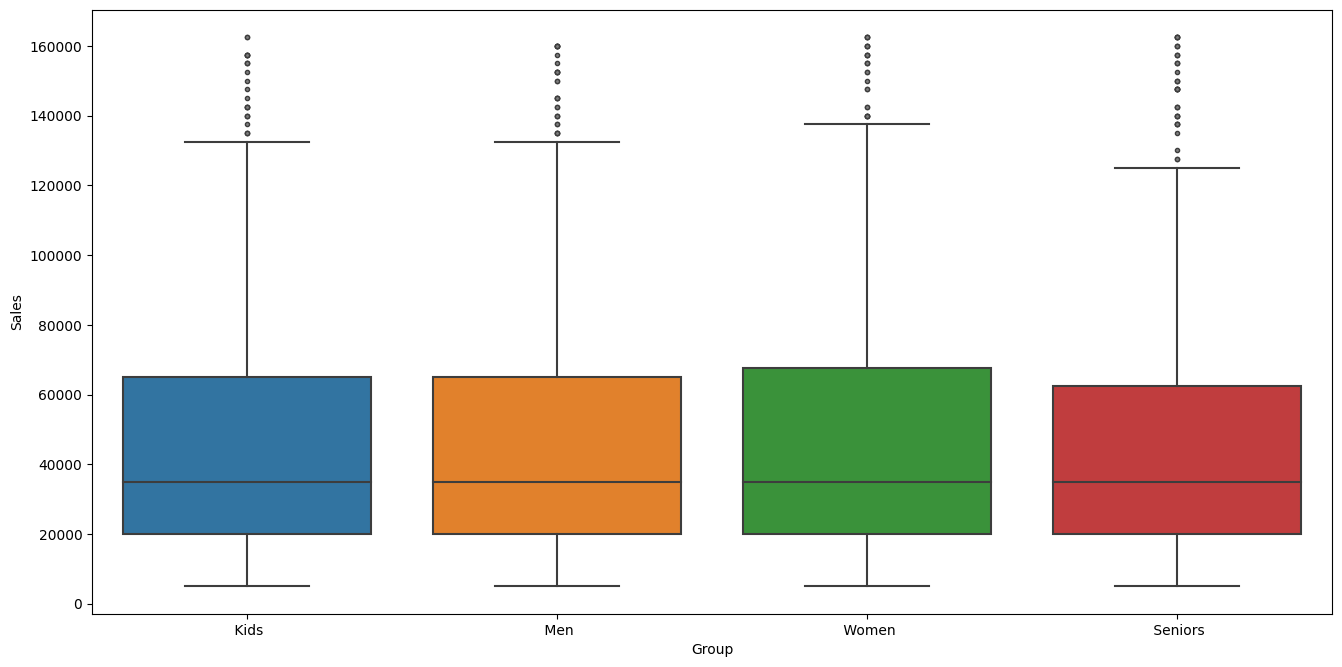

In [188]:
plt.figure(figsize=(16, 8), dpi=100)
sns.boxplot(x='Group',y='Sales',data=df,flierprops={'marker': 'o', 'markersize': 3, 'markerfacecolor': 'grey'})
print('Sales across Groups: ')

Sales across States: 


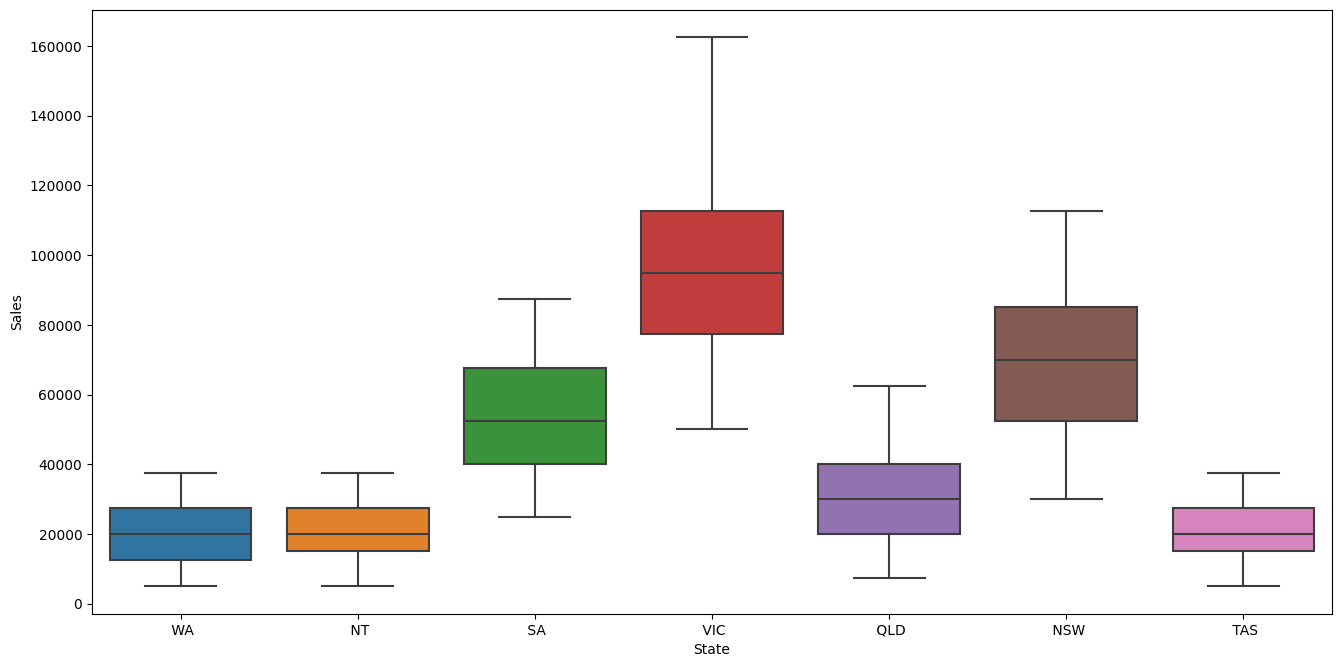

In [189]:
plt.figure(figsize=(16, 8), dpi=100)
sns.boxplot(x='State',y='Sales',data=df,flierprops={'marker': 'o', 'markersize': 3, 'markerfacecolor': 'grey'})
print('Sales across States: ')

We will now find group and state-wise average and total sales by using the groupby() method,this will also help us in visualising the respective data by a bar plot. We use bar plot because both group and states are categorical variables.

In [73]:
aggregated_data_Group=df.groupby('Group').agg(total_sales=('Sales','sum'), avg_sales=('Sales','mean'), total_units=('Unit','sum'),avg_units=('Unit','mean'))
aggregated_data_Group


,total_sales,avg_sales,total_units,avg_units
Group,,,,
Kids,85072500,45011.904762,34029,18.004762
Men,85750000,45370.370370,34300,18.148148
Seniors,84037500,44464.285714,33615,17.785714
Women,85442500,45207.671958,34177,18.083069


Total Quartely Sales across groups: 


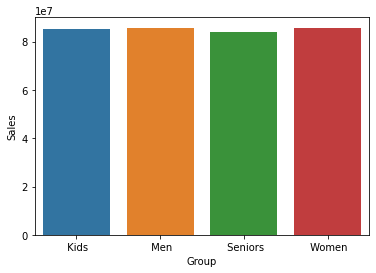

In [182]:
group_q=df.groupby('Group').sum().reset_index()
cat_g=sns.barplot(x='Group', y='Sales', data=group_q)

print('Total Quartely Sales across groups: ')

In [92]:
aggregated_data_State=df.groupby('State').agg(total_sales=('Sales','sum'), avg_sales=('Sales','mean'), total_units=('Unit','sum'),avg_units=('Unit','mean'))
aggregated_data_State

,total_sales,avg_sales,total_units,avg_units
State,,,,
NSW,74970000,69416.666667,29988,27.766667
NT,22580000,20907.407407,9032,8.362963
QLD,33417500,30942.129630,13367,12.376852
SA,58857500,54497.685185,23543,21.799074
TAS,22760000,21074.074074,9104,8.429630
VIC,105565000,97745.370370,42226,39.098148
WA,22152500,20511.574074,8861,8.204630


Total Quartely Sales across States: 


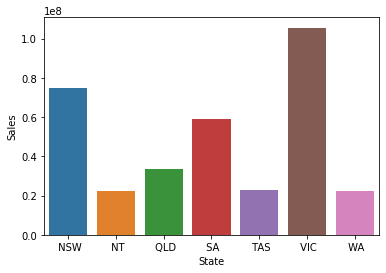

In [179]:
state_q=df.groupby('State').sum().reset_index()

cat_s=sns.barplot(x='State', y='Sales', data=state_q)
print('Total Quartely Sales across States: ')

As we can see, the total and average sales across groups are approximately similar however the states NT, TAS and WA have the least total and average sales value. While VIC,NSW and SA have higher sales value.

We will now explore daily, weekly and monthly data of both Group and State variables. For visualization purposes we will use line plot since we need to understand trends over a range of time.

In [151]:
states_daily=df.groupby('State').resample('D').agg({'Sales':['sum','mean'],'Unit':['sum','mean']})
states_daily_nan=states_daily.dropna()
states_daily_nan

Sales               Unit           
                     sum          mean  sum       mean
State Date                                            
 NSW  2020-10-01  877500  73125.000000  351  29.250000
      2020-10-02  850000  70833.333333  340  28.333333
      2020-10-03  810000  67500.000000  324  27.000000
      2020-10-04  845000  70416.666667  338  28.166667
      2020-10-05  815000  67916.666667  326  27.166667
...                  ...           ...  ...        ...
 WA   2020-12-26  277500  23125.000000  111   9.250000
      2020-12-27  305000  25416.666667  122  10.166667
      2020-12-28  280000  23333.333333  112   9.333333
      2020-12-29  305000  25416.666667  122  10.166667
      2020-12-30  340000  28333.333333  136  11.333333

[630 rows x 4 columns]

Average daily sales across states: 


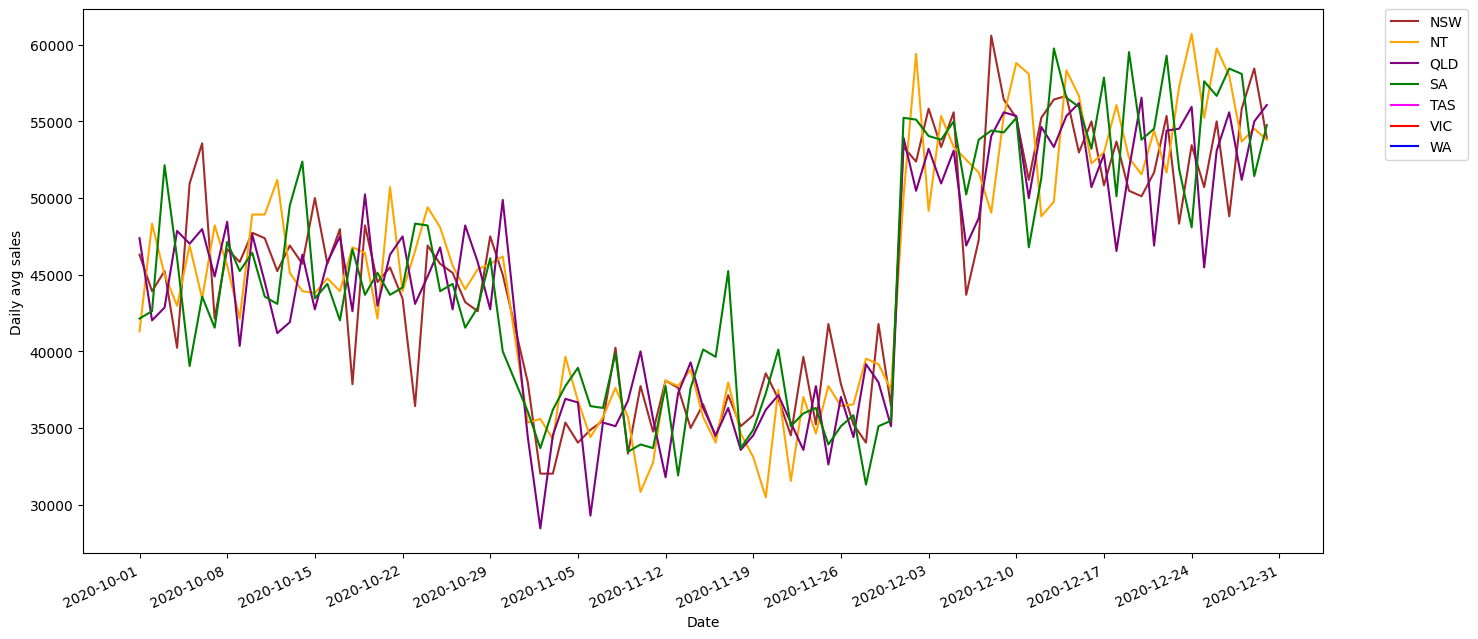

In [177]:
#daily indexing
daily_NSW = states_daily_nan.iloc[0:90]
daily_NT = states_daily_nan.iloc[90:180]
daily_QLD = states_daily_nan.iloc[180:270]
daily_SA = states_daily_nan.iloc[270:360]
daily_TAS = states_daily_nan.iloc[360:450]
daily_VIC = states_daily_nan.iloc[450:540]
daily_WA = states_daily_nan.iloc[540:630]
#set_index from multi-index
daily_NSW.index=daily_NSW.index.get_level_values('Date')
daily_NT.index=daily_NT.index.get_level_values('Date')
daily_QLD.index=daily_QLD.index.get_level_values('Date')
daily_SA.index=daily_SA.index.get_level_values('Date')
daily_TAS.index=daily_TAS.index.get_level_values('Date')
daily_VIC.index=daily_VIC.index.get_level_values('Date')
daily_WA.index=daily_WA.index.get_level_values('Date')
#index mean values
mean_NSW_d=daily_NSW['Sales']['mean']
mean_NT_d=daily_NT['Sales']['mean']
mean_QLD_d=daily_QLD['Sales']['mean']
mean_SA_d=daily_SA['Sales']['mean']
mean_TAS_d=daily_TAS['Sales']['mean']
mean_VIC_d=daily_VIC['Sales']['mean']
mean_WA_d=daily_WA['Sales']['mean']
#plot
plt.figure(figsize=(16, 8), dpi=100) 
mean_NSW_d.plot(label='NSW',color='brown')
mean_NT_d.plot(label='NT',color='orange')
mean_QLD_d.plot(label='QLD',color='purple')
mean_SA_d.plot(label='SA',color='green')
mean_TAS_d.plot(label='TAS',color='magenta')
mean_VIC_d.plot(label='VIC',color='red')
mean_WA_d.plot(label='WA',color='blue')

plt.ylabel('Daily avg sales')
plt.xticks(ticks=np.arange('2020-10-04','2021-01-10',dtype='datetime64[W]'),labels=np.arange('2020-10-04','2021-01-10',dtype='datetime64[W]'),rotation=25)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
print('Average daily sales across states: ')



In [143]:
states_weekly=df.groupby('State').resample('W').agg({'Sales':['sum','mean'],'Unit':['sum','mean']})
states_weekly


Sales                Unit           
                      sum          mean   sum       mean
State Date                                              
 NSW  2020-10-04  3382500  70468.750000  1353  28.187500
      2020-10-11  5892500  70148.809524  2357  28.059524
      2020-10-18  5717500  68065.476190  2287  27.226190
      2020-10-25  5922500  70505.952381  2369  28.202381
      2020-11-01  4822500  66979.166667  1929  26.791667
...                   ...           ...   ...        ...
 WA   2020-12-06  2060000  24523.809524   824   9.809524
      2020-12-13  2145000  25535.714286   858  10.214286
      2020-12-20  2005000  23869.047619   802   9.547619
      2020-12-27  2092500  24910.714286   837   9.964286
      2021-01-03   925000  25694.444444   370  10.277778

[98 rows x 4 columns]

Average weekly sales across states: 


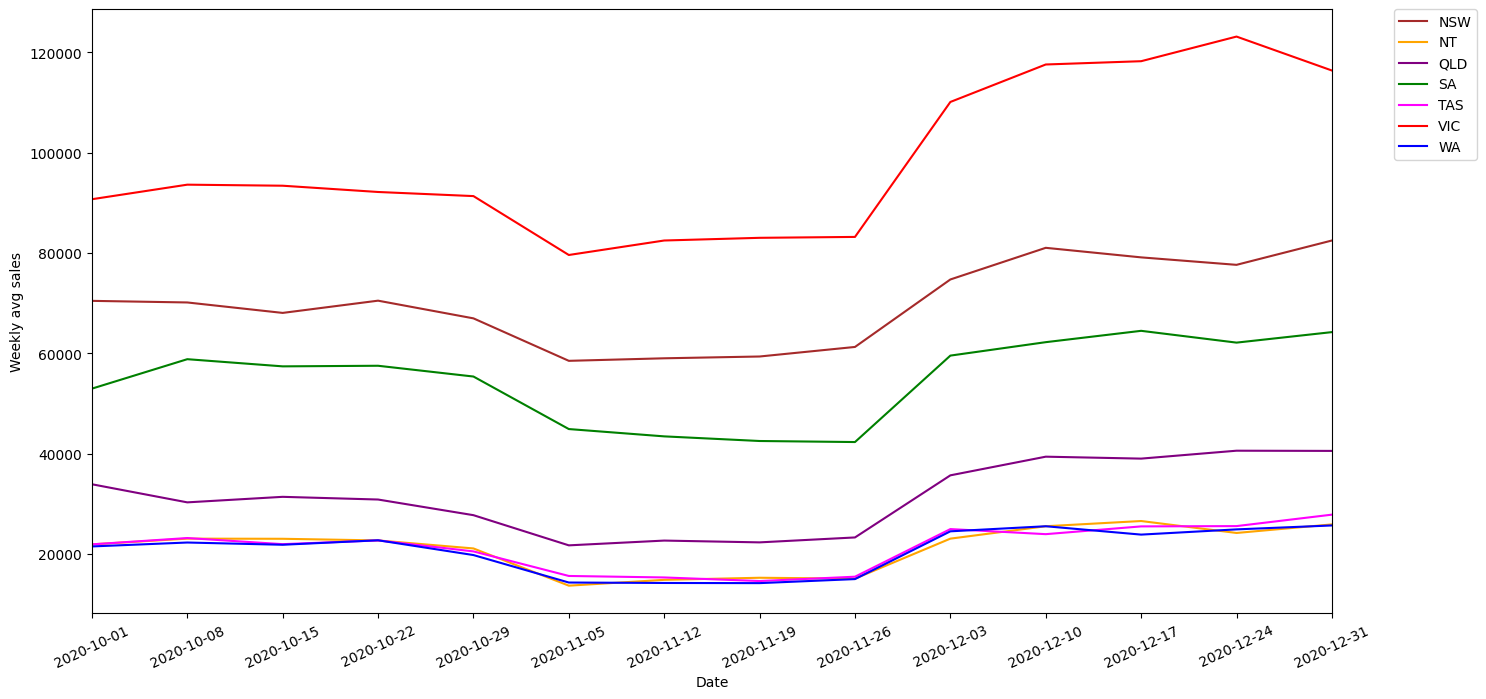

In [102]:
#weekly indexing
weekly_NSW = df.groupby('State').resample('W').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[0:14]
weekly_NT = df.groupby('State').resample('W').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[14:28]
weekly_QLD = df.groupby('State').resample('W').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[28:42]
weekly_SA= df.groupby('State').resample('W').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[42:56]
weekly_TAS = df.groupby('State').resample('W').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[56:70]
weekly_VIC = df.groupby('State').resample('W').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[70:84]
weekly_WA= df.groupby('State').resample('W').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[84:]
#set_index from multi-index
weekly_NSW.index=weekly_NSW.index.get_level_values('Date')
weekly_NT.index=weekly_NT.index.get_level_values('Date')
weekly_QLD.index=weekly_QLD.index.get_level_values('Date')
weekly_SA.index=weekly_SA.index.get_level_values('Date')
weekly_TAS.index=weekly_TAS.index.get_level_values('Date')
weekly_VIC.index=weekly_VIC.index.get_level_values('Date')
weekly_WA.index=weekly_WA.index.get_level_values('Date')
#index mean values
mean_NSW=weekly_NSW['Sales']['mean']
mean_NT=weekly_NT['Sales']['mean']
mean_QLD=weekly_QLD['Sales']['mean']
mean_SA=weekly_SA['Sales']['mean']
mean_TAS=weekly_TAS['Sales']['mean']
mean_VIC=weekly_VIC['Sales']['mean']
mean_WA=weekly_WA['Sales']['mean']
#plot
plt.figure(figsize=(16, 8), dpi=100) 
mean_NSW.plot(label='NSW',color='brown')
mean_NT.plot(label='NT',color='orange')
mean_QLD.plot(label='QLD',color='purple')
mean_SA.plot(label='SA',color='green')
mean_TAS.plot(label='TAS',color='magenta')
mean_VIC.plot(label='VIC',color='red')
mean_WA.plot(label='WA',color='blue')

plt.ylabel('Weekly avg sales')
plt.xticks(ticks=np.arange('2020-10-04','2021-01-10',dtype='datetime64[W]'),labels=np.arange('2020-10-04','2021-01-10',dtype='datetime64[W]'),rotation=25)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
print('Average weekly sales across states: ')



In [40]:
states_monthly=df.groupby('State').resample('M').agg({'Sales':['sum','mean'],'Unit':['sum','mean']})
states_monthly

Sales                  Unit           
                       sum           mean    sum       mean
State Date                                                 
 NSW  2020-10-31  25007500   69465.277778  10003  27.786111
      2020-11-30  21490000   59694.444444   8596  23.877778
      2020-12-31  28472500   79090.277778  11389  31.636111
 NT   2020-10-31   8222500   22840.277778   3289   9.136111
      2020-11-30   5257500   14604.166667   2103   5.841667
      2020-12-31   9100000   25277.777778   3640  10.111111
 QLD  2020-10-31  11120000   30888.888889   4448  12.355556
      2020-11-30   8110000   22527.777778   3244   9.011111
      2020-12-31  14187500   39409.722222   5675  15.763889
 SA   2020-10-31  20610000   57250.000000   8244  22.900000
      2020-11-30  15532500   43145.833333   6213  17.258333
      2020-12-31  22715000   63097.222222   9086  25.238889
 TAS  2020-10-31   8015000   22263.888889   3206   8.905556
      2020-11-30   5545000   15402.777778   2218   6.161111
      2020-12-31   9200000   25555.555556   3680  10.222222
 VIC  2020-10-31  33442500   92895.833333  13377  37.158333
      2020-11-30  29530000   82027.777778  11812  32.811111
      2020-12-31  42592500  118312.500000  17037  47.325000
 WA   2020-10-31   7872500   21868.055556   3149   8.747222
      2020-11-30   5217500   14493.055556   2087   5.797222
      2020-12-31   9062500   25173.611111   3625  10.069444

Monthly average sales across states:


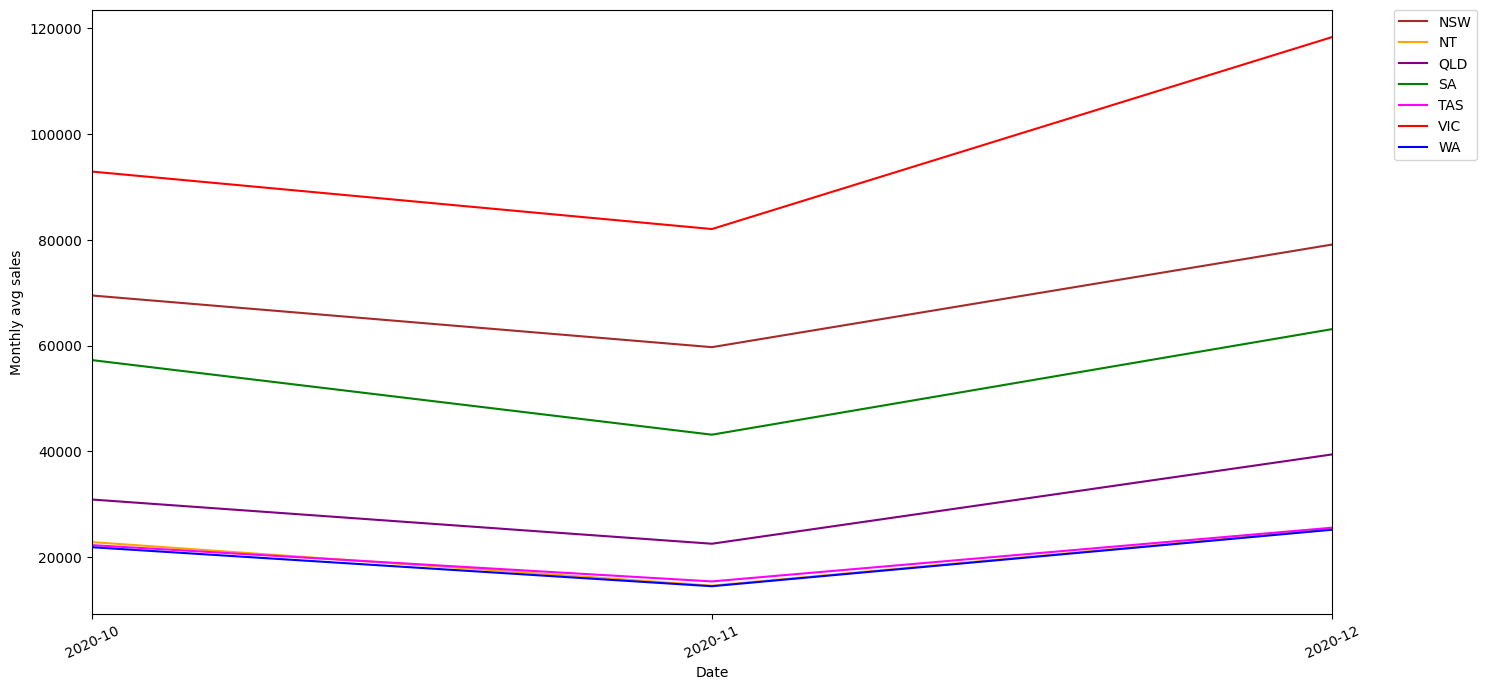

In [105]:
#monthly indexing
monthly_NSW = df.groupby('State').resample('M').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[0:3]
monthly_NT = df.groupby('State').resample('M').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[3:6]
monthly_QLD = df.groupby('State').resample('M').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[6:9]
monthly_SA = df.groupby('State').resample('M').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[9:12]
monthly_TAS = df.groupby('State').resample('M').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[12:15]
monthly_VIC = df.groupby('State').resample('M').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[15:18]
monthly_WA = df.groupby('State').resample('M').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[18:21]
#set_index from multi-index
monthly_NSW.index=monthly_NSW.index.get_level_values('Date')
monthly_NT.index=monthly_NT.index.get_level_values('Date')
monthly_QLD.index=monthly_QLD.index.get_level_values('Date')
monthly_SA.index=monthly_SA.index.get_level_values('Date')
monthly_TAS.index=monthly_TAS.index.get_level_values('Date')
monthly_VIC.index=monthly_VIC.index.get_level_values('Date')
monthly_WA.index=monthly_WA.index.get_level_values('Date')
#index mean values
mean_NSW_M=monthly_NSW['Sales']['mean']
mean_NT_M=monthly_NT['Sales']['mean']
mean_QLD_M=monthly_QLD['Sales']['mean']
mean_SA_M=monthly_SA['Sales']['mean']
mean_TAS_M=monthly_TAS['Sales']['mean']
mean_VIC_M=monthly_VIC['Sales']['mean']
mean_WA_M=monthly_WA['Sales']['mean']
#plot
plt.figure(figsize=(16, 8), dpi=100) 
mean_NSW_M.plot(label='NSW',color='brown')
mean_NT_M.plot(label='NT',color='orange')
mean_QLD_M.plot(label='QLD',color='purple')
mean_SA_M.plot(label='SA',color='green')
mean_TAS_M.plot(label='TAS',color='magenta')
mean_VIC_M.plot(label='VIC',color='red')
mean_WA_M.plot(label='WA',color='blue')
plt.ylabel('Monthly avg sales')
plt.xticks(ticks=np.arange('2020-10-04','2021-01-17',dtype='datetime64[M]'),labels=np.arange('2020-10-04','2021-01-17',dtype='datetime64[M]'),rotation=25)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
print('Monthly average sales across states:')

In [165]:
group_daily=df.groupby('Group').resample('D').agg({'Sales':['sum','mean'],'Unit':['sum','mean']})
group_daily_nan=group_daily.dropna()
group_daily_nan

Sales               Unit           
                       sum          mean  sum       mean
Group  Date                                             
 Kids  2020-10-01   972500  46309.523810  389  18.523810
       2020-10-02   922500  43928.571429  369  17.571429
       2020-10-03   950000  45238.095238  380  18.095238
       2020-10-04   845000  40238.095238  338  16.095238
       2020-10-05  1070000  50952.380952  428  20.380952
...                    ...           ...  ...        ...
 Women 2020-12-26  1190000  56666.666667  476  22.666667
       2020-12-27  1227500  58452.380952  491  23.380952
       2020-12-28  1220000  58095.238095  488  23.238095
       2020-12-29  1080000  51428.571429  432  20.571429
       2020-12-30  1150000  54761.904762  460  21.904762

[360 rows x 4 columns]

Average daily sales across group : 


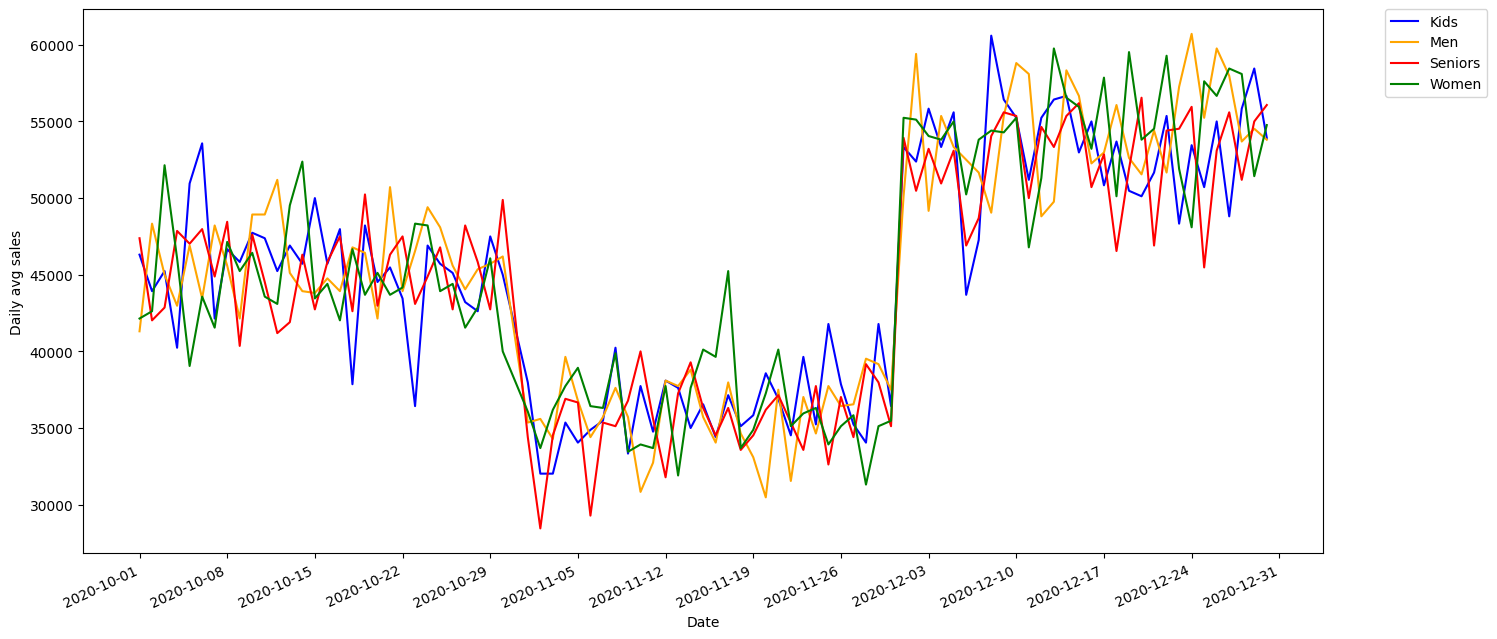

In [178]:
#daily indexing
daily_Kids = group_daily_nan.iloc[0:90]
daily_Men = group_daily_nan.iloc[90:180]
daily_Seniors = group_daily_nan.iloc[180:270]
daily_Women = group_daily_nan.iloc[270:360]
#set_index from multi-index
daily_Kids.index=daily_Kids.index.get_level_values('Date')
daily_Men.index=daily_Men.index.get_level_values('Date')
daily_Seniors.index=daily_Seniors.index.get_level_values('Date')
daily_Women.index=daily_Women.index.get_level_values('Date')
#indexing mean values
mean_Kids_d=daily_Kids['Sales']['mean']
mean_Men_d=daily_Men['Sales']['mean']
mean_Seniors_d=daily_Seniors['Sales']['mean']
mean_Women_d=daily_Women['Sales']['mean']
#plot
plt.figure(figsize=(16, 8), dpi=100) 
mean_Kids_d.plot(label='Kids',color='blue')
mean_Men_d.plot(label='Men',color='orange')
mean_Seniors_d.plot(label='Seniors',color='red')
mean_Women_d.plot(label='Women',color='green')
plt.ylabel('Daily avg sales')
plt.xticks(ticks=np.arange('2020-10-04','2021-01-10',dtype='datetime64[W]'),labels=np.arange('2020-10-04','2021-01-10',dtype='datetime64[W]'),rotation=25)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
print('Average daily sales across group : ')




In [57]:
weekly_Group=df.groupby('Group').resample('W').agg({'Sales':['sum','mean'],'Unit':['sum','mean']})
weekly_Group

Sales                Unit           
                         sum          mean   sum       mean
Group    Date                                              
 Kids    2020-10-04  3690000  43928.571429  1476  17.571429
         2020-10-11  7020000  47755.102041  2808  19.102041
         2020-10-18  6707500  45629.251701  2683  18.251701
         2020-10-25  6525000  44387.755102  2610  17.755102
         2020-11-01  5490000  43571.428571  2196  17.428571
         2020-11-08  5125000  34863.945578  2050  13.945578
         2020-11-15  5315000  36156.462585  2126  14.462585
         2020-11-22  5302500  36071.428571  2121  14.428571
         2020-11-29  5577500  37942.176871  2231  15.176871
         2020-12-06  7362500  50085.034014  2945  20.034014
         2020-12-13  8030000  54625.850340  3212  21.850340
         2020-12-20  7765000  52823.129252  3106  21.129252
         2020-12-27  7630000  51904.761905  3052  20.761905
         2021-01-03  3532500  56071.428571  1413  22.428571
 Men     2020-10-04  3730000  44404.761905  1492  17.761905
         2020-10-11  6807500  46309.523810  2723  18.523810
         2020-10-18  6710000  45646.258503  2684  18.258503
         2020-10-25  6872500  46751.700680  2749  18.700680
         2020-11-01  5507500  43710.317460  2203  17.484127
         2020-11-08  5335000  36292.517007  2134  14.517007
         2020-11-15  5242500  35663.265306  2097  14.265306
         2020-11-22  5025000  34183.673469  2010  13.673469
         2020-11-29  5482500  37295.918367  2193  14.918367
         2020-12-06  7505000  51054.421769  3002  20.421769
         2020-12-13  7802500  53078.231293  3121  21.231293
         2020-12-20  7990000  54353.741497  3196  21.741497
         2020-12-27  8337500  56717.687075  3335  22.687075
         2021-01-03  3402500  54007.936508  1361  21.603175
 Seniors 2020-10-04  3782500  45029.761905  1513  18.011905
         2020-10-11  6737500  45833.333333  2695  18.333333
         2020-10-18  6470000  44013.605442  2588  17.605442
         2020-10-25  6757500  45969.387755  2703  18.387755
         2020-11-01  5540000  43968.253968  2216  17.587302
         2020-11-08  4962500  33758.503401  1985  13.503401
         2020-11-15  5397500  36717.687075  2159  14.687075
         2020-11-22  5200000  35374.149660  2080  14.149660
         2020-11-29  5302500  36071.428571  2121  14.428571
         2020-12-06  7217500  49098.639456  2887  19.639456
         2020-12-13  7805000  53095.238095  3122  21.238095
         2020-12-20  7772500  52874.149660  3109  21.149660
         2020-12-27  7685000  52278.911565  3074  20.911565
         2021-01-03  3407500  54087.301587  1363  21.634921
 Women   2020-10-04  3842500  45744.047619  1537  18.297619
         2020-10-11  6437500  43792.517007  2575  17.517007
         2020-10-18  6752500  45935.374150  2701  18.374150
         2020-10-25  6660000  45306.122449  2664  18.122449
         2020-11-01  5270000  41825.396825  2108  16.730159
         2020-11-08  5442500  37023.809524  2177  14.809524
         2020-11-15  5217500  35493.197279  2087  14.197279
         2020-11-22  5585000  37993.197279  2234  15.197279
         2020-11-29  5115000  34795.918367  2046  13.918367
         2020-12-06  7537500  51275.510204  3015  20.510204
         2020-12-13  7887500  53656.462585  3155  21.462585
         2020-12-20  8127500  55289.115646  3251  22.115646
         2020-12-27  8117500  55221.088435  3247  22.088435
         2021-01-03  3450000  54761.904762  1380  21.904762

Average weekly sales across group : 


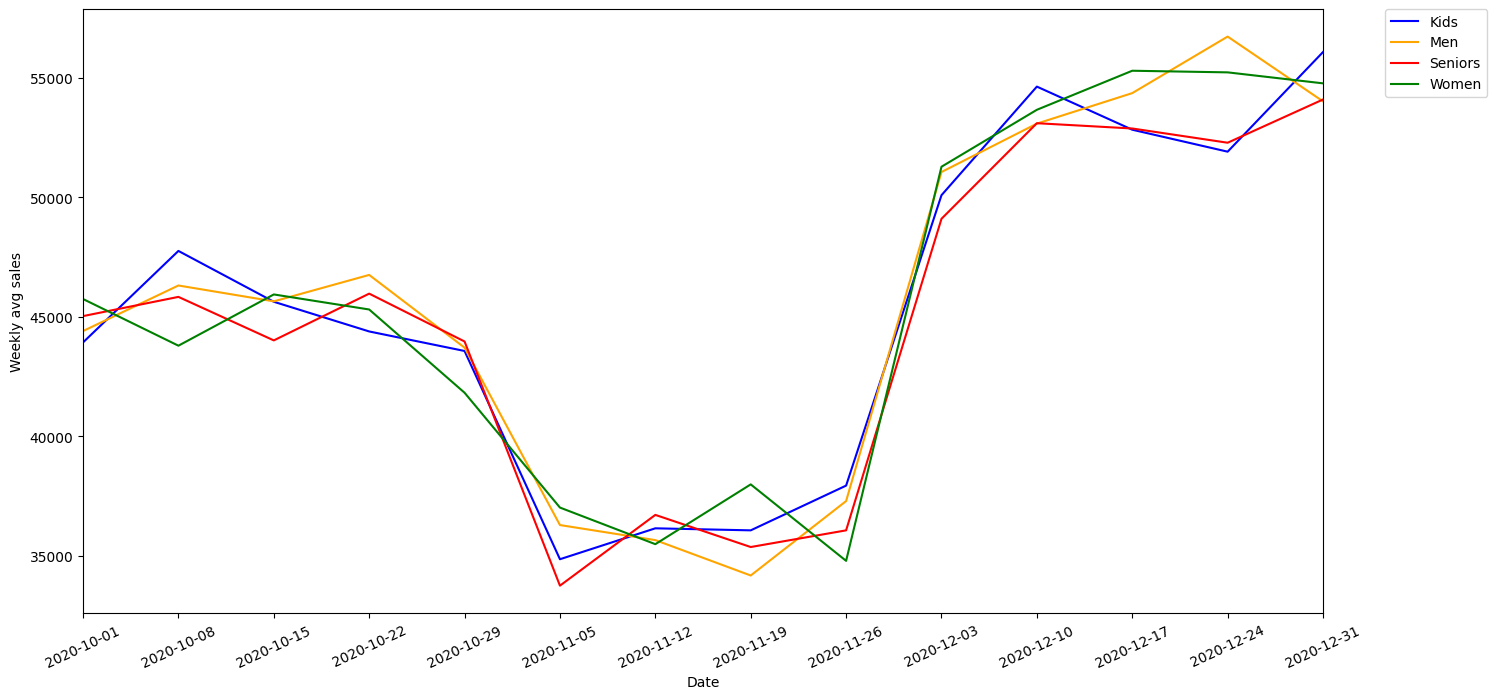

In [198]:
#weekly indexing
weekly_Kids = df.groupby('Group').resample('W').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[0:14]
weekly_Men = df.groupby('Group').resample('W').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[14:28]
weekly_Seniors = df.groupby('Group').resample('W').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[28:42]
weekly_Women = df.groupby('Group').resample('W').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[42:56]
#set_index from multi-index
weekly_Kids.index=weekly_Kids.index.get_level_values('Date')
weekly_Men.index=weekly_Men.index.get_level_values('Date')
weekly_Seniors.index=weekly_Seniors.index.get_level_values('Date')
weekly_Women.index=weekly_Women.index.get_level_values('Date')
#index mean values
mean_Kids=weekly_Kids['Sales']['mean']
mean_Men=weekly_Men['Sales']['mean']
mean_Seniors=weekly_Seniors['Sales']['mean']
mean_Women=weekly_Women['Sales']['mean']
#plot
plt.figure(figsize=(16, 8), dpi=100) 
mean_Kids.plot(label='Kids',color='blue')
mean_Men.plot(label='Men',color='orange')
mean_Seniors.plot(label='Seniors',color='red')
mean_Women.plot(label='Women',color='green')
plt.ylabel('Weekly avg sales')
plt.xticks(ticks=np.arange('2020-10-04','2021-01-10',dtype='datetime64[W]'),labels=np.arange('2020-10-04','2021-01-10',dtype='datetime64[W]'),rotation=25)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
print('Average weekly sales across group : ')


In [65]:
monthly_Group=df.groupby('Group').resample('M').agg({'Sales':['sum','mean'],'Unit':['sum','mean']})
monthly_Group

Sales                 Unit           
                          sum          mean    sum       mean
Group    Date                                                
 Kids    2020-10-31  28635000  45452.380952  11454  18.180952
         2020-11-30  22882500  36321.428571   9153  14.528571
         2020-12-31  33555000  53261.904762  13422  21.304762
 Men     2020-10-31  28885000  45849.206349  11554  18.339683
         2020-11-30  22615000  35896.825397   9046  14.358730
         2020-12-31  34250000  54365.079365  13700  21.746032
 Seniors 2020-10-31  28565000  45341.269841  11426  18.136508
         2020-11-30  22322500  35432.539683   8929  14.173016
         2020-12-31  33150000  52619.047619  13260  21.047619
 Women   2020-10-31  28205000  44769.841270  11282  17.907937
         2020-11-30  22862500  36289.682540   9145  14.515873
         2020-12-31  34375000  54563.492063  13750  21.825397

Average monthly sales across group : 


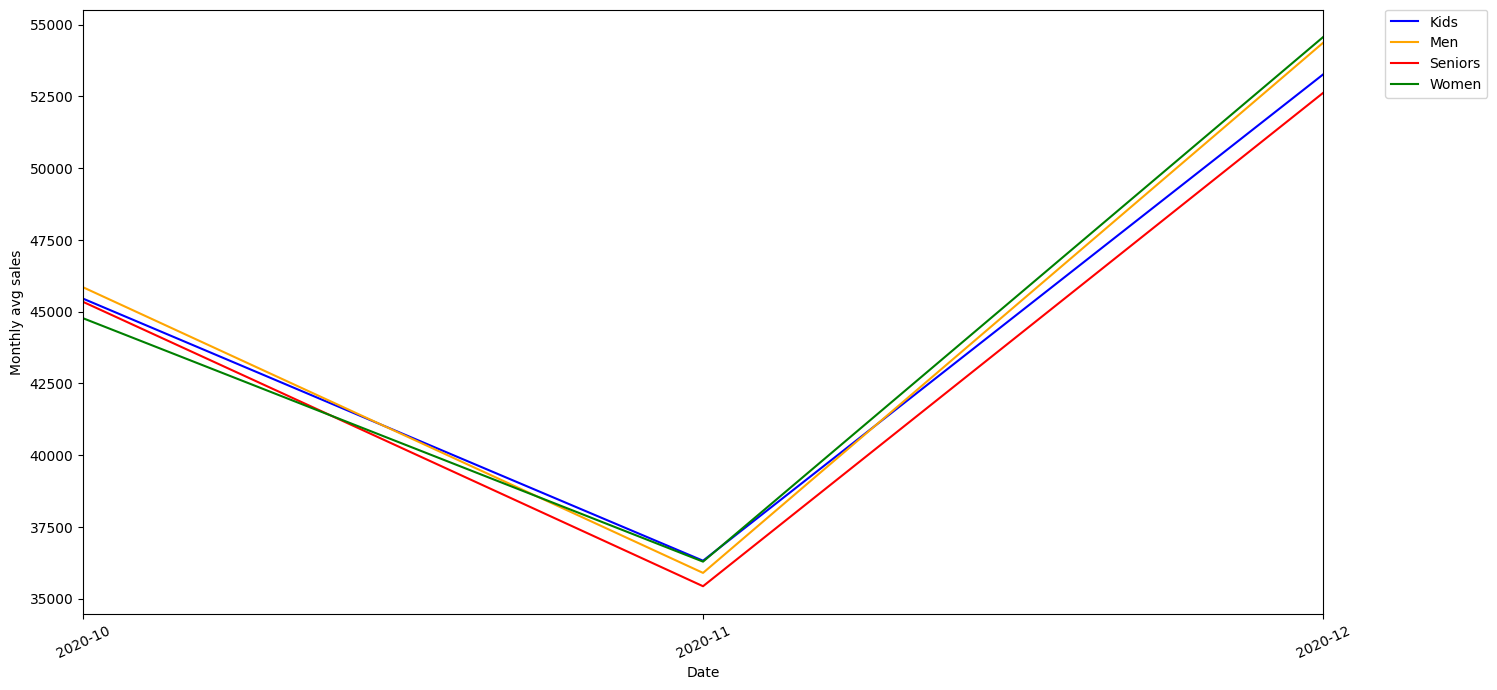

In [106]:
#monthly indexing
monthly_Kids = df.groupby('Group').resample('M').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[0:3]
monthly_Men = df.groupby('Group').resample('M').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[3:6]
monthly_Seniors = df.groupby('Group').resample('M').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[6:9]
monthly_Women = df.groupby('Group').resample('M').agg({'Sales':['sum','mean'],'Unit':['sum','mean']}).iloc[9:12]
#set_index from multi-index
monthly_Kids.index=monthly_Kids.index.get_level_values('Date')
monthly_Men.index=monthly_Men.index.get_level_values('Date')
monthly_Seniors.index=monthly_Seniors.index.get_level_values('Date')
monthly_Women.index=monthly_Women.index.get_level_values('Date')
#index mean values
mean_Kids_M=monthly_Kids['Sales']['mean']
mean_Men_M=monthly_Men['Sales']['mean']
mean_Seniors_M=monthly_Seniors['Sales']['mean']
mean_Women_M=monthly_Women['Sales']['mean']
#plot
plt.figure(figsize=(16, 8), dpi=100) 
mean_Kids_M.plot(label='Kids',color='blue')
mean_Men_M.plot(label='Men',color='orange')
mean_Seniors_M.plot(label='Seniors',color='red')
mean_Women_M.plot(label='Women',color='green')
plt.ylabel('Monthly avg sales')
plt.xticks(ticks=np.arange('2020-10-04','2021-01-17',dtype='datetime64[M]'),labels=np.arange('2020-10-04','2021-01-17',dtype='datetime64[M]'),rotation=25)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
print('Average monthly sales across group : ')


## __Observations:__
- The data for both Group and State on a daily interval is noisy however we can observe a pattern of reduced (off-peak) sales period in the month of November and increased sales(peak) in December.
- The data for average weekly sales clearly shows poor performance by NT, TAS and WA. However the daily trend    seems to translate as for all states into weekly sales as they drop in the month of November and rise again in the month of December.
- The data for average monthly sales clearly shows poor performance by NT, TAS and WA. However the weekly trend seems to translate as for all states into monthly sales as they drop in the month of November and rise again in the month of December.
- It is only in the average monthly sales do we find the seniors contributing lowest to sales on an average across all groups close to the month of November.
- Data clearly shows that the states of VIC, NSW and SA have higher sales on weekly and monthly basis, they also have the highest sales in Oct-Dec quarter.


We will now look at state-wise data across group and group-wise data across states.

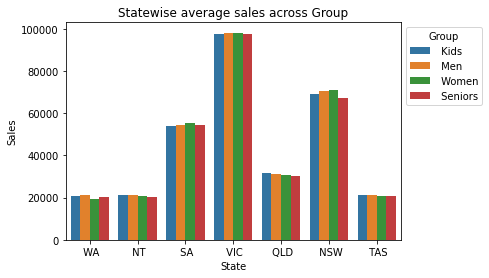

In [199]:
leg_0=sns.barplot(x='State',y='Sales',data=df, hue='Group',ci=None)
sns.move_legend(leg_0, "upper left", bbox_to_anchor=(1, 1))
plt.title('Statewise average sales across Group')
plt.show()

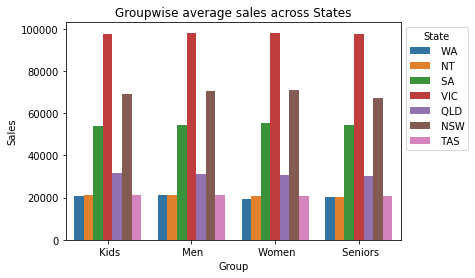

In [200]:
leg_1=sns.barplot(x='Group',y='Sales',data=df, hue='State',ci=None)
sns.move_legend(leg_1, "upper left", bbox_to_anchor=(1, 1))
plt.title('Groupwise average sales across States')
plt.show()

## __Observations:__
- Our observations from previous analysis are re-confirmed as we see that VIC, NSW and SA are states with higher sales value across all groups.
- Across all states however, average sales values corresponding to groups (kids, men, women and seniors) remain similar.

Let  us now apply normalisation.

<AxesSubplot:xlabel='Sales', ylabel='Count'>

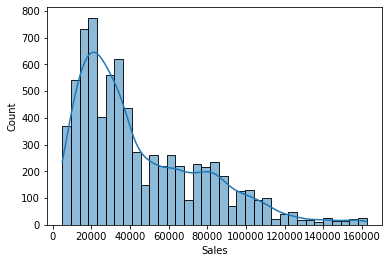

In [205]:
sns.histplot(df['Sales'],kde=True)

<AxesSubplot:xlabel='Unit', ylabel='Count'>

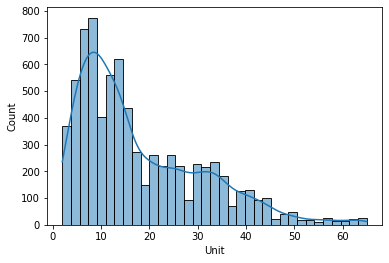

In [204]:
sns.histplot(df['Unit'],kde=True)

In [206]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Sales', 'Unit']] = scaler.fit_transform(df[['Sales', 'Unit']])
print(df)

                  Time State     Group      Unit     Sales
Date                                                      
2020-10-01     Morning    WA      Kids  0.095238  0.095238
2020-10-01     Morning    WA       Men  0.095238  0.095238
2020-10-01     Morning    WA     Women  0.031746  0.031746
2020-10-01     Morning    WA   Seniors  0.206349  0.206349
2020-10-01   Afternoon    WA      Kids  0.015873  0.015873
...                ...   ...       ...       ...       ...
2020-12-30   Afternoon   TAS   Seniors  0.190476  0.190476
2020-12-30     Evening   TAS      Kids  0.206349  0.206349
2020-12-30     Evening   TAS       Men  0.206349  0.206349
2020-12-30     Evening   TAS     Women  0.142857  0.142857
2020-12-30     Evening   TAS   Seniors  0.174603  0.174603

[7560 rows x 5 columns]


<AxesSubplot:ylabel='Count'>

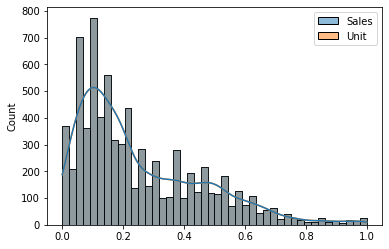

In [207]:
new=df[['Sales', 'Unit']]
sns.histplot(new, kde = True)